# Cuáles son los personajes más populares: LA GRAN FINAL

In [93]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [94]:
import pandas as pd

In [109]:
import squarify
import matplotlib.pyplot as plt

Vamos a usar os csv que hemos ido creando de cada película

In [95]:
df1 = pd.read_csv('csv/Personajes_relevantes/HP_1.csv')
df2 = pd.read_csv('csv/Personajes_relevantes/HP_2.csv')
df3 = pd.read_csv('csv/Personajes_relevantes/HP_3.csv')
df4 = pd.read_csv('csv/Personajes_relevantes/HP_4.csv')
df5 = pd.read_csv('csv/Personajes_relevantes/HP_5.csv')
df6 = pd.read_csv('csv/Personajes_relevantes/HP_6.csv')
df7 = pd.read_csv('csv/Personajes_relevantes/HP_7.csv')
df8 = pd.read_csv('csv/Personajes_relevantes/HP_8.csv')

Concatenamos los dataframes

In [96]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
df_concatenado = pd.concat(frames, ignore_index=True)
df_concatenado

,Personaje,Total
0,Harry Potter,408
1,Ron Weasley,176
2,Hermione Granger,127
3,Rubeus Hagrid,120
4,Albus Dumbledore,59
...,...,...
75,Severus Snape,67
76,Neville Longbottom,47
77,Griphook,40
78,Luna Lovegood,26


Los agrupamos por personaje

In [97]:
df_final = df_concatenado.groupby("Personaje")["Total"].sum().reset_index()
df_final

,Personaje,Total
0,Aberforth Dumbledore,19
1,Alastor Moody,102
2,Albus Dumbledore,688
3,Arthur Weasley,22
4,Bartemius Crouch,36
5,Bellatrix Lestrange,16
6,Cedric Diggory,42
7,Cornelius Fudge,112
8,Dobby,132
9,Dolores Umbridge,99


Los ordenamos de mayor a menor porque nos interesa ver los personajes más relevantes en total

In [98]:
df_final = df_final.sort_values(by="Total", ascending=False).reset_index(drop=True)
df_final

,Personaje,Total
0,Harry Potter,3104
1,Ron Weasley,1064
2,Hermione Granger,1048
3,Albus Dumbledore,688
4,Rubeus Hagrid,325
5,Severus Snape,222
6,Horace Slughorn,169
7,Voldemort,154
8,Tom Riddle,144
9,Sirius Black,142


"Voldemort" y "Tom Riddle" es el mismo personaje solo que llamado de dos formas diferentes. Por lo que vamos a unirlos.

In [99]:
nuevo_df = df_final[df_final["Personaje"].isin(["Voldemort", "Tom Riddle"])]
nuevo_df


,Personaje,Total
7,Voldemort,154
8,Tom Riddle,144


In [100]:
suma_totales = nuevo_df["Total"].sum()
nuevo_df = pd.concat([nuevo_df, pd.DataFrame({"Personaje": "Voldemort+Tom",'Total': [suma_totales]})], ignore_index=True)
nuevo_df

,Personaje,Total
0,Voldemort,154
1,Tom Riddle,144
2,Voldemort+Tom,298


Vamos a limpiar esto para quedarnos solo con la sumna y concatenarlo después

In [101]:
voldy = nuevo_df.iloc[2:3].copy()
voldy

,Personaje,Total
2,Voldemort+Tom,298


Vamos a eliminarlos de la lista original

In [102]:
df_final = df_final[~df_final['Personaje'].isin(["Tom Riddle", "Voldemort"])].reset_index(drop=True)
df_final

,Personaje,Total
0,Harry Potter,3104
1,Ron Weasley,1064
2,Hermione Granger,1048
3,Albus Dumbledore,688
4,Rubeus Hagrid,325
5,Severus Snape,222
6,Horace Slughorn,169
7,Sirius Black,142
8,Dobby,132
9,Draco Malfoy,115


Ahora, vamos a concatenarlo con la original

In [103]:
df_final = pd.concat([df_final, voldy], ignore_index=True)
df_final

,Personaje,Total
0,Harry Potter,3104
1,Ron Weasley,1064
2,Hermione Granger,1048
3,Albus Dumbledore,688
4,Rubeus Hagrid,325
5,Severus Snape,222
6,Horace Slughorn,169
7,Sirius Black,142
8,Dobby,132
9,Draco Malfoy,115


Volvemos a ordenarlos para ver, ahora si que si, quiénes son los más relevantes de esta historia mágica.

In [104]:
df_final = df_final.sort_values(by="Total", ascending=False).reset_index(drop=True)
df_final

,Personaje,Total
0,Harry Potter,3104
1,Ron Weasley,1064
2,Hermione Granger,1048
3,Albus Dumbledore,688
4,Rubeus Hagrid,325
5,Voldemort+Tom,298
6,Severus Snape,222
7,Horace Slughorn,169
8,Sirius Black,142
9,Dobby,132


Vamos a guardar esto en csv por si lo volvemos a necesitar

In [106]:
df_final.to_csv('csv/Personajes_relevantes/Total.csv', index=False)

Nos vamos a quedar con los primeros 10

In [121]:
primeras_10_filas = df_final.head(10)
primeras_10_filas

,Personaje,Total
0,Harry Potter,3104
1,Ron Weasley,1064
2,Hermione Granger,1048
3,Albus Dumbledore,688
4,Rubeus Hagrid,325
5,Voldemort+Tom,298
6,Severus Snape,222
7,Horace Slughorn,169
8,Sirius Black,142
9,Dobby,132


Pasamos a CSV también

In [122]:
primeras_10_filas.to_csv('csv/Personajes_relevantes/Total_Top 10.csv', index=False)

Sacamos gráfica

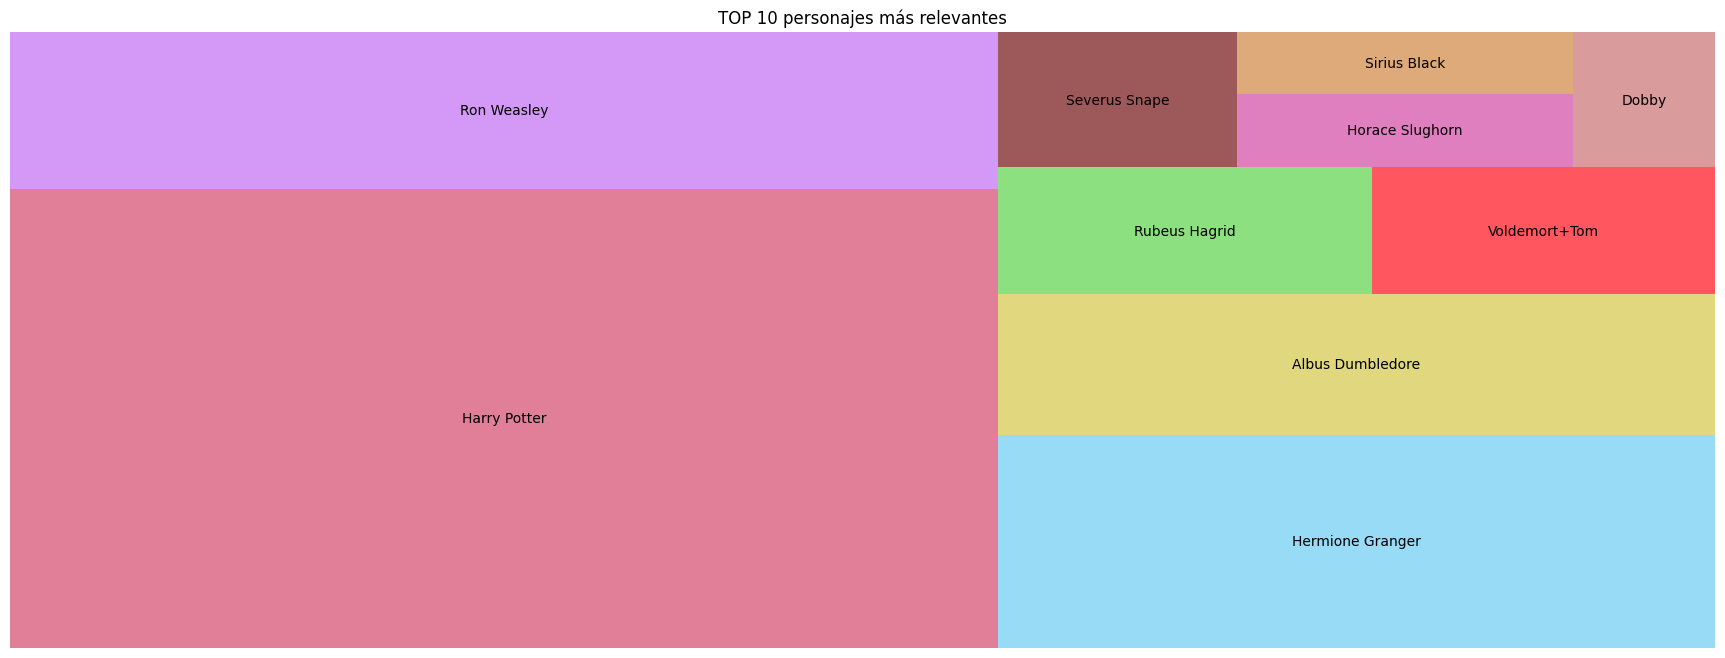

In [133]:
# Ordenamos el DataFrame por la columna "total"
primeras_10_filas = primeras_10_filas.sort_values(by="Total", ascending=False)

# lista de tamaños para las cajas
sizes = primeras_10_filas['Total']

# lista de etiquetas para las cajas
labels = primeras_10_filas['Personaje']

colores = ["#D4496B", "#C26DF5", "#6DCDF5", "#D4C749", "#5DD449", "#FF0E1C", "#741212", "#D449A5", "#D08641", "#CA7171"]

plt.figure(figsize=(22, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=colores)

plt.title("TOP 10 personajes más relevantes")

plt.axis('off')
plt.show()


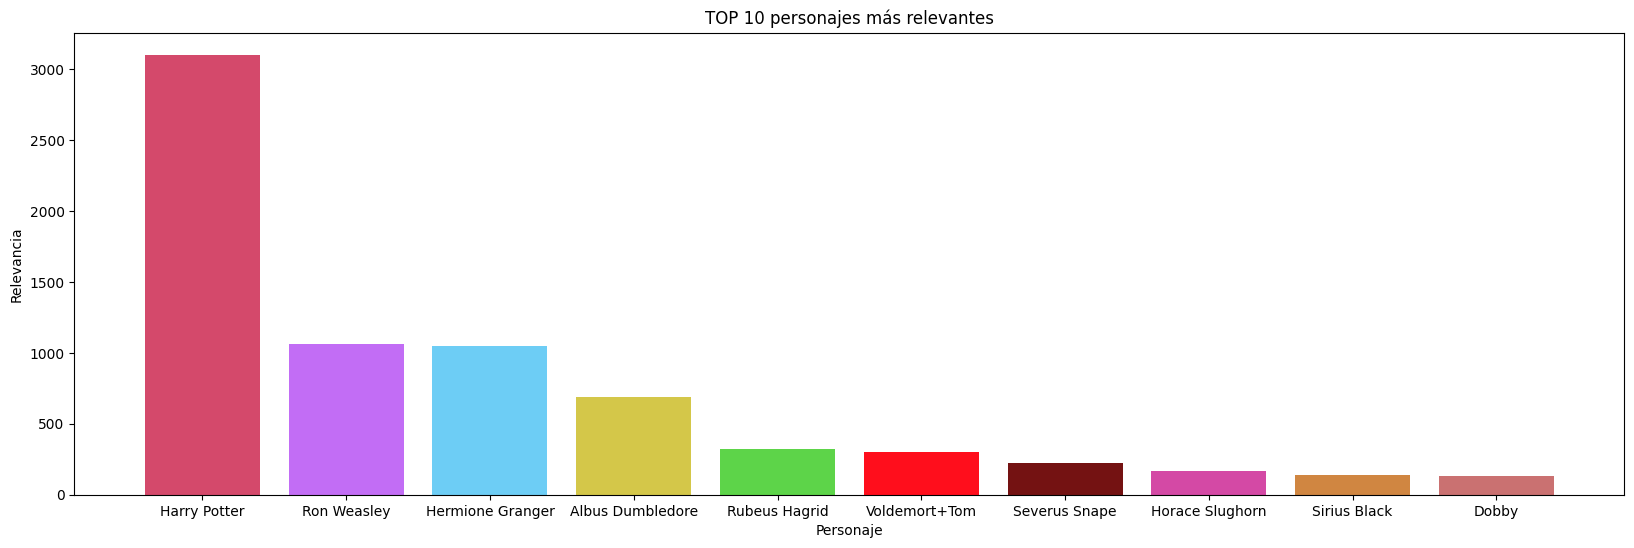

In [132]:
personajes = primeras_10_filas['Personaje']
total = primeras_10_filas['Total']

colores = ["#D4496B", "#C26DF5", "#6DCDF5", "#D4C749", "#5DD449", "#FF0E1C", "#741212", "#D449A5", "#D08641", "#CA7171"]


plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("TOP 10 personajes más relevantes")

plt.show()